# Classification
This file includes code which classifies text chunks as (Austen, Shelly, Kafka, Tolstoy or Dostoyevsky).
The training data is text chunks from their respective works _Pride and predjudice_, _Frankenstein_, _The trial_, _Anna Karenina_ and _Crime and punishment_. We obtain the texts from the Gutenberg Project.

## Importing the data

## Kmeans

### UMAP

In [5]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans

In [6]:
X = np.load('text_data.npy')
y = np.load('labels.npy')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.1)

mapper = umap.UMAP(n_neighbors=30,
                   min_dist=0.0,
                   n_components=256,
                   random_state=3).fit(X_val, y=y_val)
embedding_train = mapper.transform(X_train)
embedding_test = mapper.transform(X_test)

c:\Users\maria\anaconda3\envs\textembedding\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [20]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(embedding_train)

In [ ]:
clustering = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(X)

In [21]:
ari = adjusted_rand_score(y_train, labels)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.9658610043700233


In [14]:
ari = adjusted_rand_score(y, clustering)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.13809552879872186


Text(0.5, 1.0, 'Fashion MNIST Embedded via UMAP')

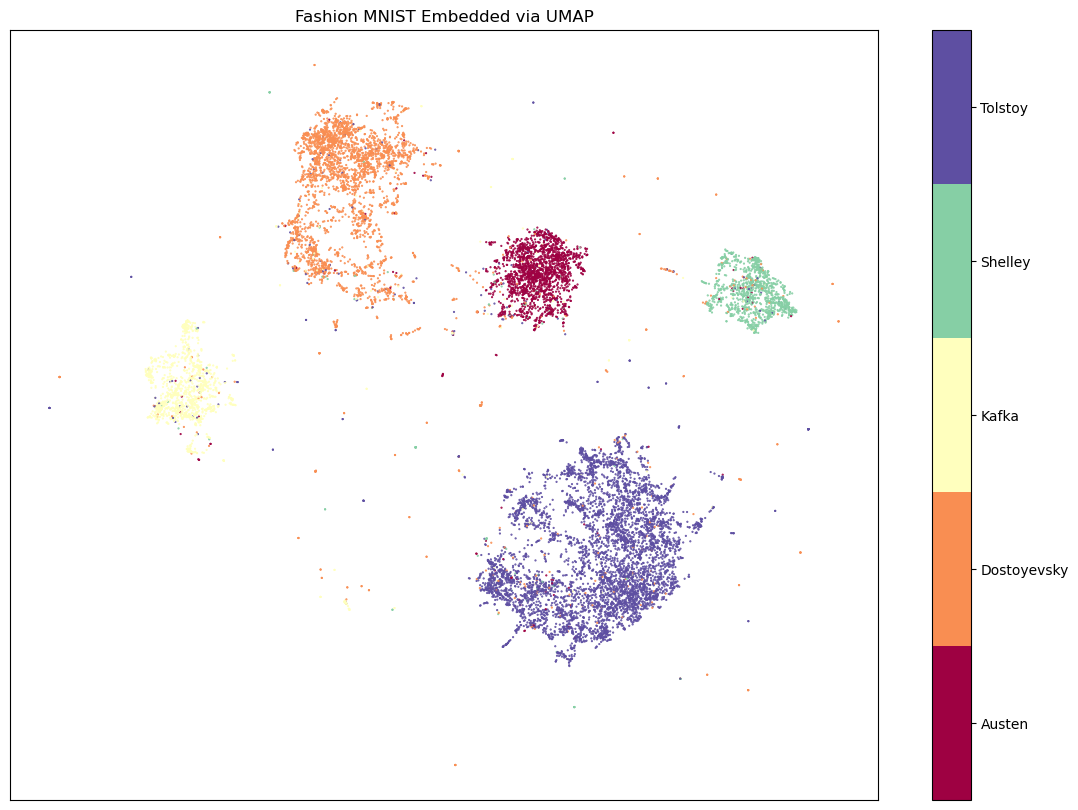

In [78]:
classes = ['Austen', 'Dostoyevsky', 'Kafka', 'Shelley', 'Tolstoy']

fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding_train.T, s=0.3, c=y_train, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(6)-0.5)
cbar.set_ticks(np.arange(5))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP')

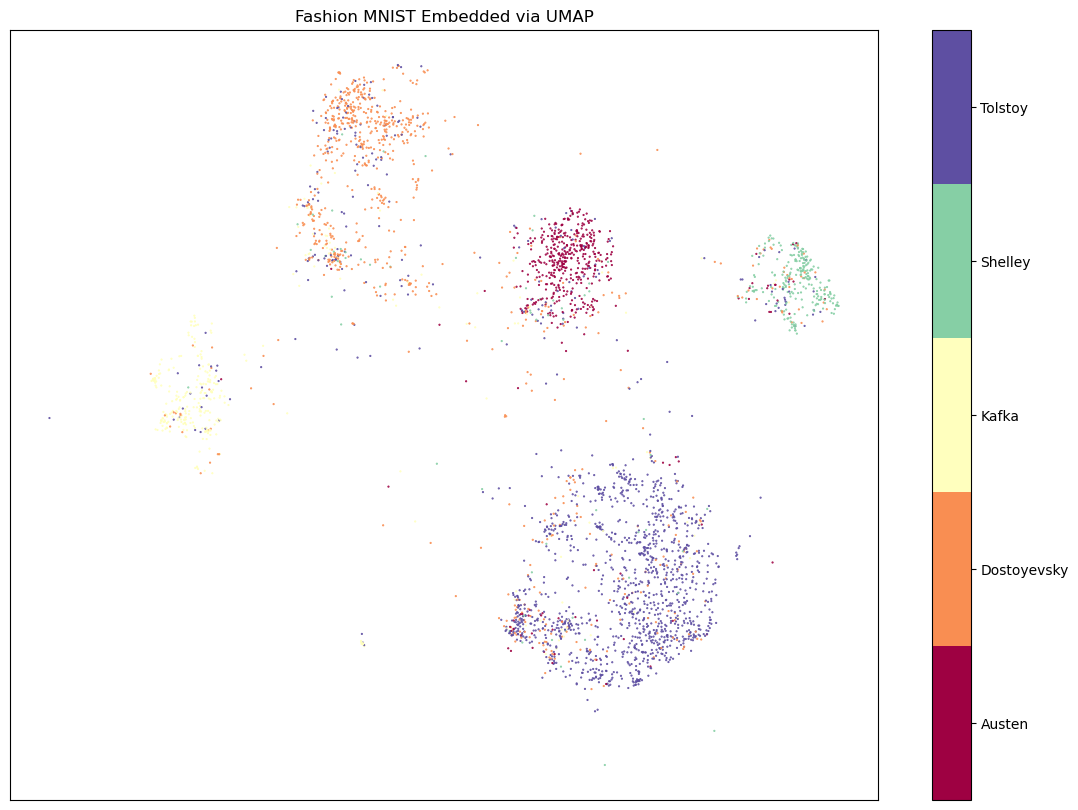

In [79]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding_test.T, s=0.3, c=y_test, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(6)-0.5)
cbar.set_ticks(np.arange(5))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP');

### K-means

In [89]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans

In [ ]:
clusterable_embedding = umap.UMAP(
    n_neighbors=10,
    min_dist=0.0,
    n_components=50,
    random_state=3,
).fit_transform(X_train)

c:\Users\maria\anaconda3\envs\textembedding\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


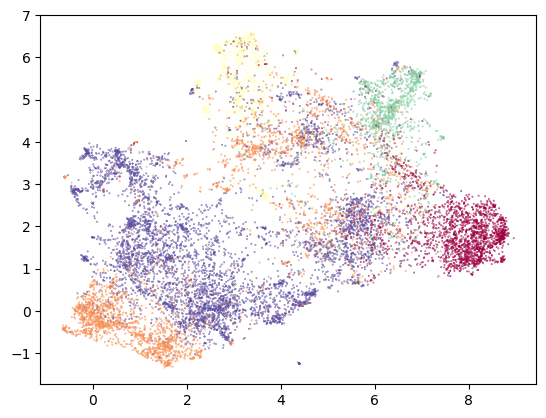

In [91]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=y_train, s=0.1, cmap='Spectral')

In [92]:
model = KMeans(n_clusters = 5, init = "k-means++")
label = model.fit_predict(X_train)

In [112]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)
labels = kmeans.labels_

# Step 2: Reduce dimensionality if needed (we will use PCA here)
pca = umap.UMAP(n_components=2)
embedding_train = pca.fit_transform(X_train, y=y_train)

In [87]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(y_train, labels)

0.304686914135733

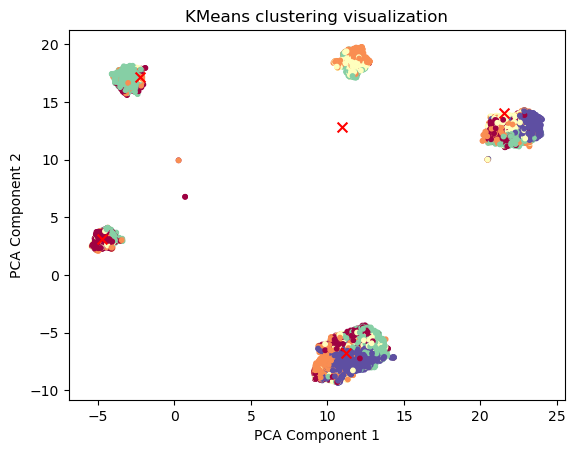

In [113]:
# Plot the clustered points
plt.scatter(embedding_train[:, 0], embedding_train[:, 1], c=labels, s=10, cmap='Spectral')

# Optional: Plot the cluster centers
centroids = pca.transform(kmeans.cluster_centers_)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='x')

# Show the plot
plt.title('KMeans clustering visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Prepare your text embeddings (example 2D numpy array of size (n_samples, 1024))
# Replace the following line with loading your own embeddings
n_samples = 1000  # Assuming you have 1000 embeddings
text_embeddings = np.random.rand(n_samples, 1024)  # Example with random embeddings

# Step 2: Apply KMeans clustering on the embeddings
n_clusters = 10  # Define the number of clusters you want to find
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(text_embeddings)
labels = kmeans.labels_

# Step 3: Optionally reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(text_embeddings)

# Step 4: Plot the clustered data
plt.figure(figsize=(10, 7))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, s=10, cmap='Spectral')

# Optional: Plot cluster centers in the reduced 2D space
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='x')
plt.title('KMeans clustering of text embeddings (PCA reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [93]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

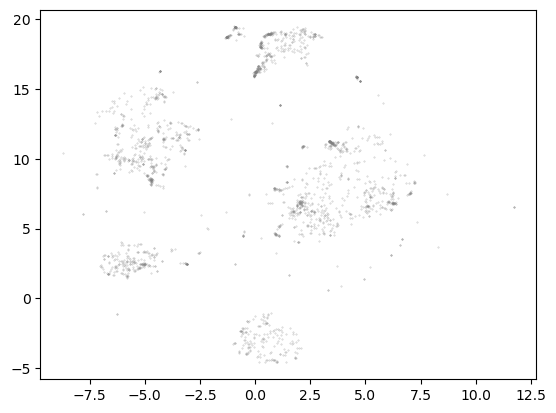

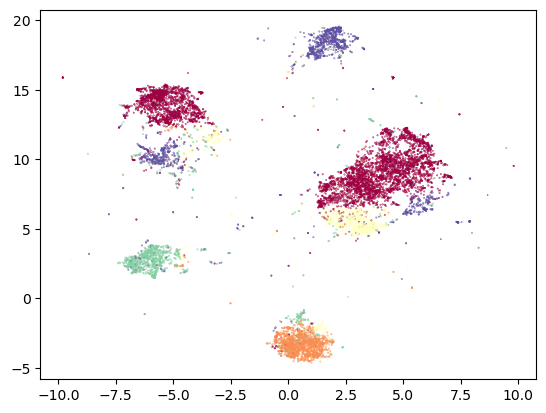

In [98]:
clustered = (labels >= 0)
plt.scatter(embedding_train[~clustered, 0],
            embedding_train[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.show()

plt.scatter(embedding_train[clustered, 0],
            embedding_train[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral')
plt.show()

In [99]:
kmeans_labels = cluster.KMeans(n_clusters=5).fit_predict(X_train)

In [101]:
accuracy_score(kmeans_labels, y_train)

0.10693663292088489

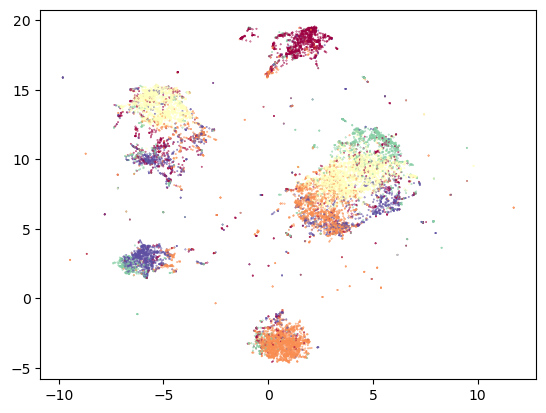

In [100]:
plt.scatter(embedding_train[:, 0], embedding_train[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral')

### "Semi-supervised learning"

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2, stratify=y.ravel(), random_state=3)

clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=1023,
    random_state=42,
).fit_transform(X_train, y=y_train)

c:\Users\maria\anaconda3\envs\textembedding\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


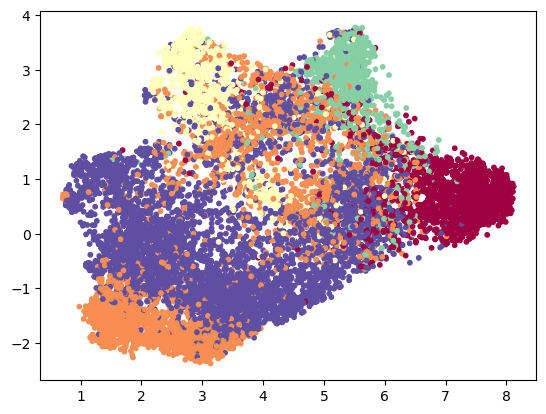

In [168]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=y_train, s=10, cmap='Spectral')

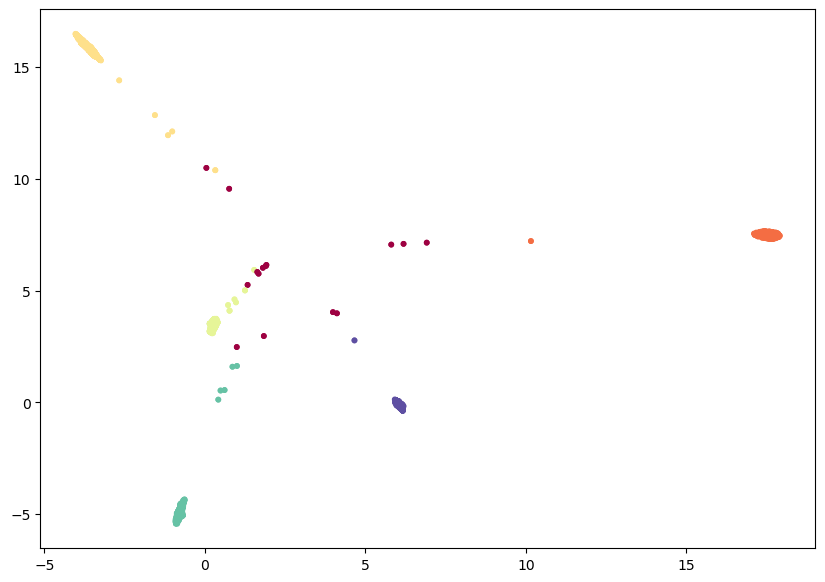

In [184]:
pca = umap.UMAP(n_components=2)
reduced_embeddings = pca.fit_transform(clusterable_embedding)

# Step 4: Plot the clustered data
plt.figure(figsize=(10, 7))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], c=labels, s=10, cmap='Spectral')


In [179]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

In [154]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(clusterable_embedding)
labels = kmeans.labels_

In [132]:
y_train

array([4, 3, 2, ..., 4, 4, 1])

In [175]:
accuracy_score(y_train, labels)

0.14653168353955756

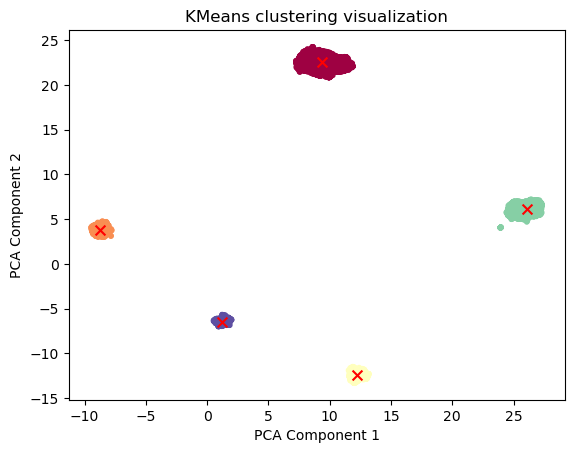

In [156]:
# Plot the clustered points
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], c=labels, s=10, cmap='Spectral')

# Optional: Plot the cluster centers
centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='x')

# Show the plot
plt.title('KMeans clustering visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [181]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y_train, labels)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.9972787501498844


In [115]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(embedding_train)
labels = kmeans.labels_

# Step 2: Reduce dimensionality if needed (we will use PCA here)
pca = PCA(n_components=2)
embedding_train = pca.fit_transform(embedding_train)

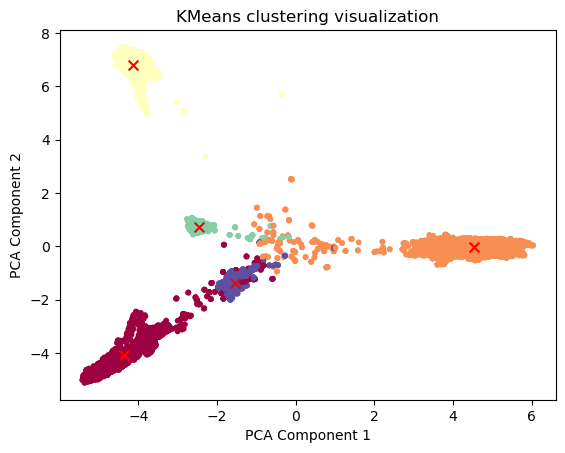

In [116]:
# Plot the clustered points
plt.scatter(embedding_train[:, 0], embedding_train[:, 1], c=labels, s=10, cmap='Spectral')

# Optional: Plot the cluster centers
centroids = pca.transform(kmeans.cluster_centers_)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='x')

# Show the plot
plt.title('KMeans clustering visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [118]:
labels

array([1, 4, 3, ..., 3, 1, 0])

In [117]:
accuracy_score(y_train, labels)

0.021297337832770904